<a href="https://colab.research.google.com/github/tonyjung01/Machine-Learning/blob/main/8-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망을 사용한 이미지 분류

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

# 8-1 내용 정리

합성곱은 이미지를 한 번에 처리하는 것이 아니라, 작은 영역을 차례로 보면서 패턴을 찾아내는 과정  
입력 데이터 위를 이동하면서 도장을 찍는 느낌

밀집층에는 뉴런마다 입력 개수 만큼의 가중치가 있음 -> 뉴런이 입력 데이터의 모든 노드와 연결  
합성곱에서는 작은 부분(커널)만 보고 필터가 이동하면서 뉴런을 만들어냄  
  
뉴런 = 필터 = 커널 ?  
필터랑 커널은 거의 같은 뜻으로 쓰이기는 하나 정확하게는 커널은 필터 내부에서 연산을 수행하는 작은 행렬  
뉴런은 특정 위치에서 입력의 작은 영역을 보고, 커널을 사용하여 합성곱 연산을 수행  
뉴런은 연산 단위, 커널은 연산을 수행하는 작은 행렬, 필터는 커널을 포함하는 CNN의 특징 추출 요소  
특성 맵 = 합성곱 계산을 통해 얻은 출력

합성곱에서 계산은 밀집층과 동일하게 단순히 입력과 가중치를 곱하는 것이지만 2차원 형태를 유지하는 점이 다름  
커널을 이동하면서 2차원 특성 맵을 만들고, 이처럼 2차원 구조를 그대로 사용하므로 합성곱 신경망이 이미지 처리에서 뛰어난 성능을 보여줌

**패딩**  
입력 배열의 주위를 가상의 원소로 채우는 것 -> 실제 입력값이 아니므로 0으로 채움  

  세임 패딩 : 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩(합성곱에서 많이 사용)    
  밸리드 패딩 : 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우


패딩을 하는 이유는?  
모서리에 있는 중요한 정보가 특성 맵으로 잘 전달되지 않을 가능성이 높음  
반대로 중앙에 있는 정보는 두드러지게 표현됨

**스트라이드**  
합성곱 연산에서 건너뛰는 칸수 (디폴트는 1)  
스트라이드가 커지면 특성 맵은 작아짐  
오른쪽으로 이동하는 크기와 아래쪽으로 이동하는 크기를 (1,1) 같은 튜플로 지정 가능  
가로세로 다르게 정하는 경우, 스트라이드가 1보다 큰 경우 모드 드물기 때문에 잘 사용하지 않음


**풀링**  
특성 맵의 가로 세로 크기를 줄이는 역할 (개수는 유지)  
풀링도 합성곱처럼 입력 위를 지나가면서 도장을 찍음  
도장을 찍은 영역에서 가장 큰 값을 고르거나(최대 풀링) 평균 값을 계산(평균 풀링)  
기본적으로는 스트라이드를 조정해서 안겹치게 함  
평균 풀링은 중요한 정보를 희석시킬 수 있으므로 만흔 경우 최대 풀링 사용

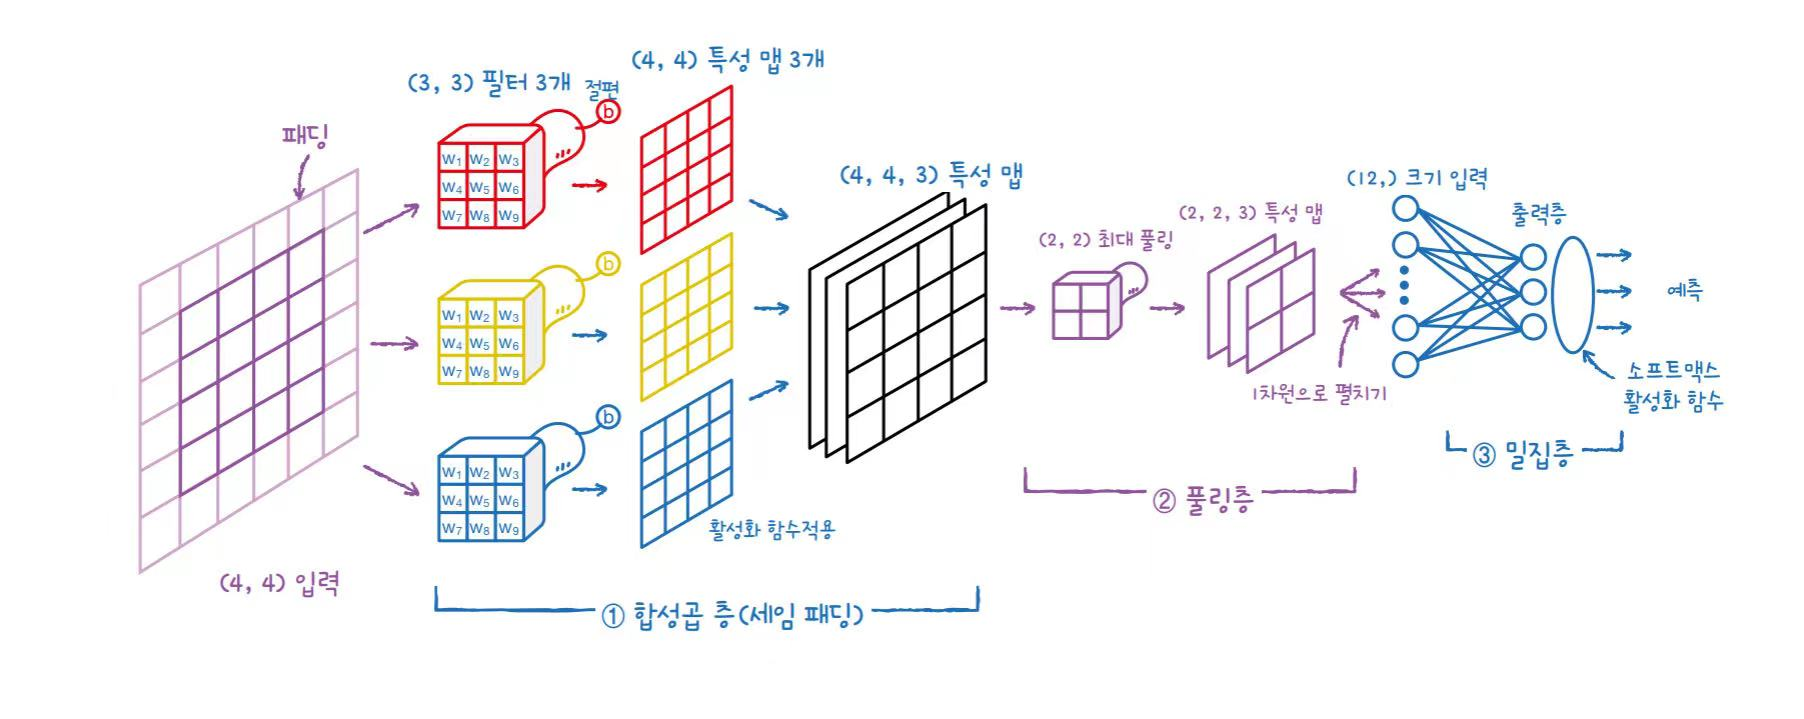

컬러 이미지는 3차원 배열로 표시됨  
너비 높이 + 길이  
입력의 깊이 = 필터의 깊이

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

## 패션 MNIST 데이터 불러오기

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 합성곱 신경망 만들기

In [3]:
model = keras.Sequential()

In [4]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32개의 필터 커널 크기 (3,3) relu 세임 패딩

In [5]:
model.add(keras.layers.MaxPooling2D(2))

(2,2) 맥스 풀링

MNIST 크기 (28,28) 세임 패딩 -> 합성곱 층에서 출력된 특성 맵 가로세로는 입력과 동일  
(2,2) 풀링 적용으로 크기 절반으로 줄고 32개 필터이므로 특성 맵 깊이 32  
풀링을 통과한 특성 맵 크기는 (14, 14, 32)

In [6]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

세임 패딩이므로 가로세로 크기 똑같다가 풀링 층에서 절반으로 줄임  
64개 필터이므로 최종 특성 맵 크기는 (7, 7, 64)

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

3차원 특성 맵을 1차원으로 펼치는 과정  
마지막에 10개의 뉴런을 가진 (밀집) 출력층에서 확률을 계산하기 때문

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

첫번째 합성곱 층은 32개의 필터를 가지고 있고 크기가 (3,3) 깊이가 1, 그리고 필터마다 1개의 절편  
3x3x1x32 + 32 = 320  
두번째 합성곱 층은 64개 필터 크기 (3,3) 깊이 32, 필터마다 1개의 절편  
3x3x32x64 + 64 = 18496  
flatten 클래스는 (7,7,64) 1차원으로 펼치므로 (3136,)  
이를 100개의 뉴런과 연결해야 하므로 은닉층 파라미터는 3136x100 + 100 = 313700  
마찬가지로 마지막 출력층은 1010  
100개의 입력과 10개의 뉴런 -> 100x10 + 10 = 1010

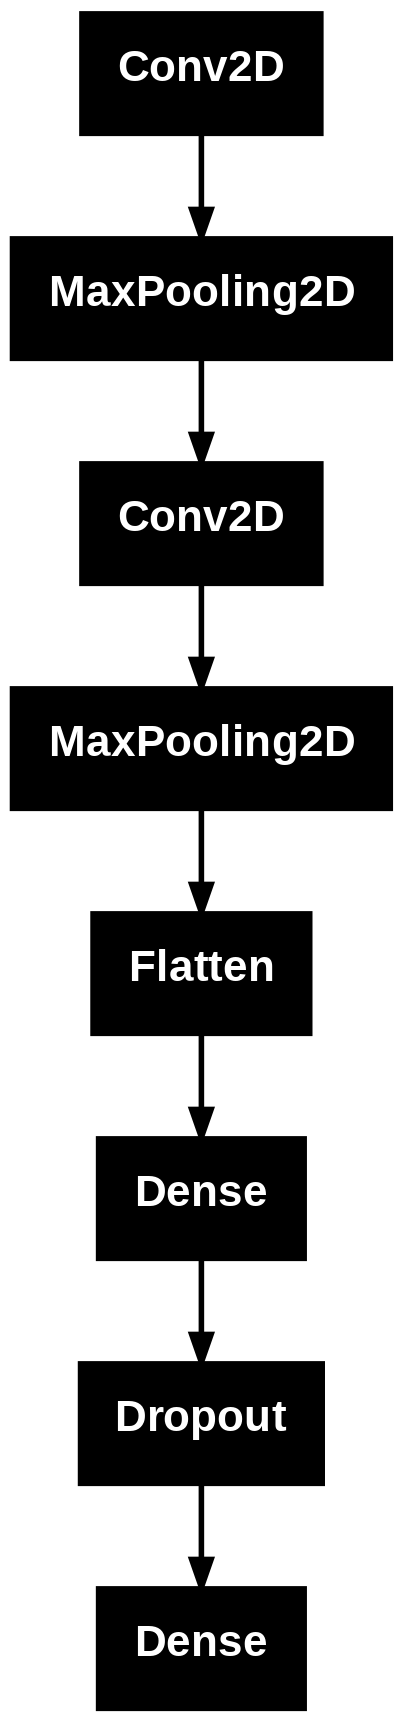

In [9]:
keras.utils.plot_model(model)

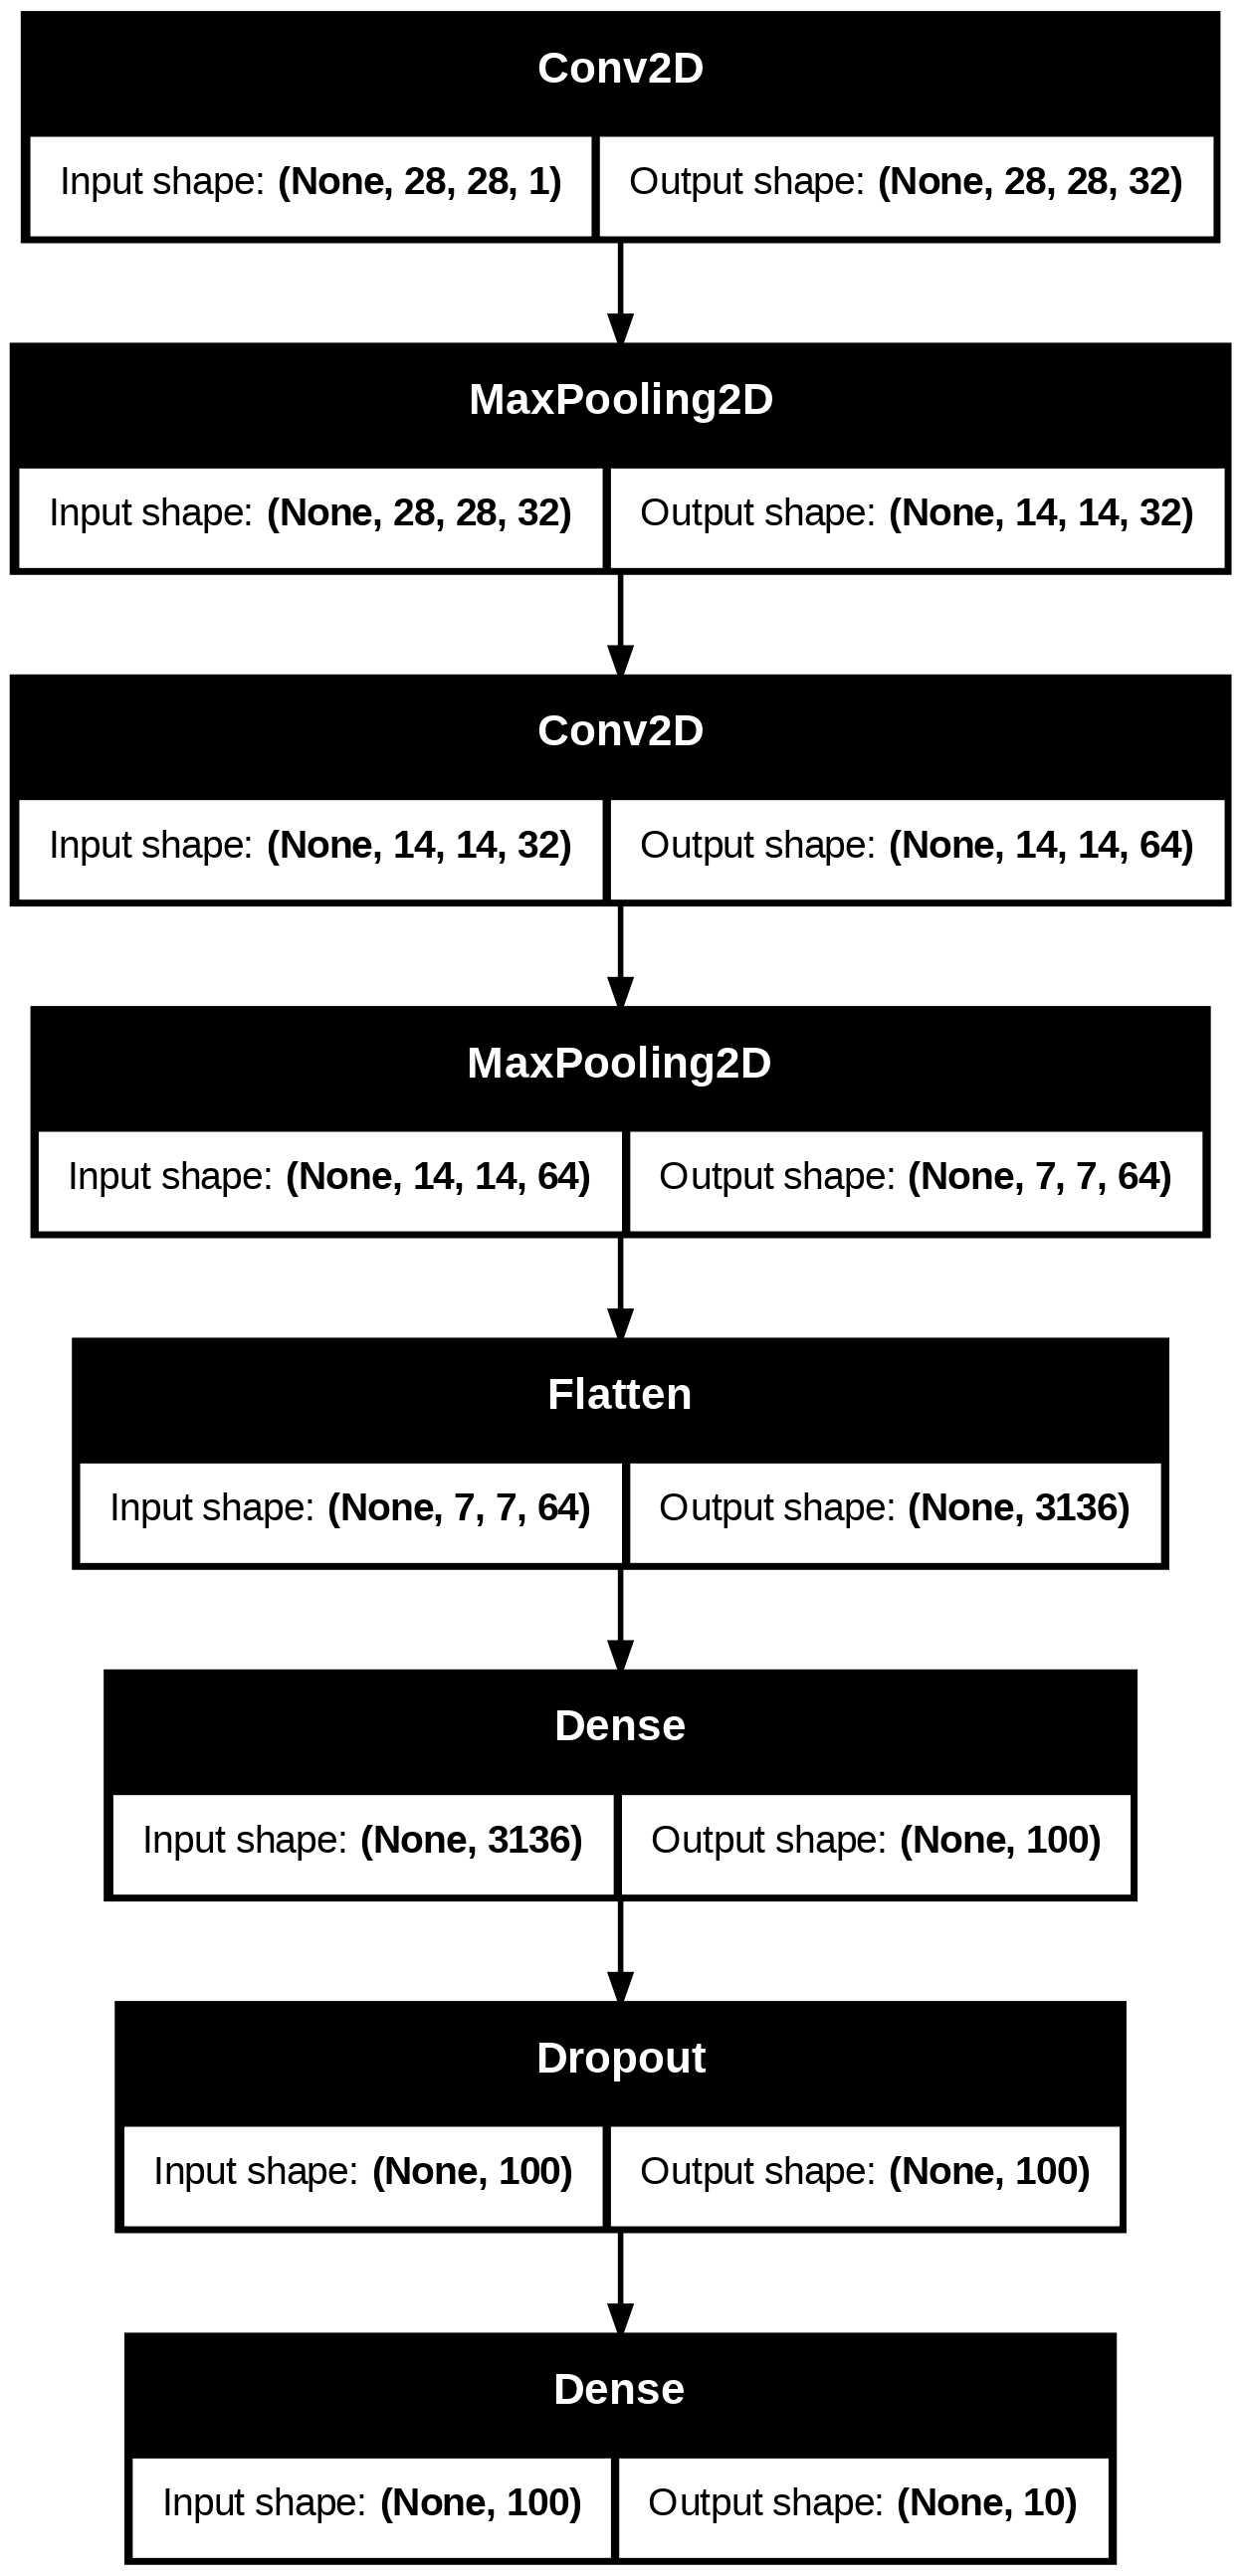

In [10]:
keras.utils.plot_model(model, show_shapes=True)

## 모델 컴파일과 훈련

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7471 - loss: 0.7067 - val_accuracy: 0.8836 - val_loss: 0.3190
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8715 - loss: 0.3573 - val_accuracy: 0.8977 - val_loss: 0.2709
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8900 - loss: 0.2995 - val_accuracy: 0.9071 - val_loss: 0.2494
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9027 - loss: 0.2632 - val_accuracy: 0.9093 - val_loss: 0.2415
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9099 - loss: 0.2431 - val_accuracy: 0.9124 - val_loss: 0.2329
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9180 - loss: 0.2194 - val_accuracy: 0.9163 - val_loss: 0.2286
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9243 - loss: 0.2033 - val_accuracy: 0.9174 - val_loss: 0.2376
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9280 - loss: 0.1864

In [12]:
import matplotlib.pyplot as plt

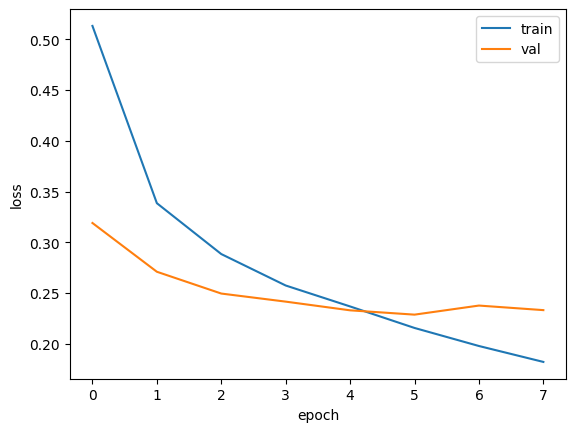

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

훈련 세트의 손실은 지속적으로 낮아지고 검증 세트 손실은 점차 감소하다가 정체되므로 잘 나옴

In [14]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9179 - loss: 0.2213


[0.2286330908536911, 0.9163333177566528]

 최적의 가중치로 복원되지만, 드롭아웃, 배치 정규화, 랜덤 연산 최적화 등의 영향으로 결과가 다를 수 있음

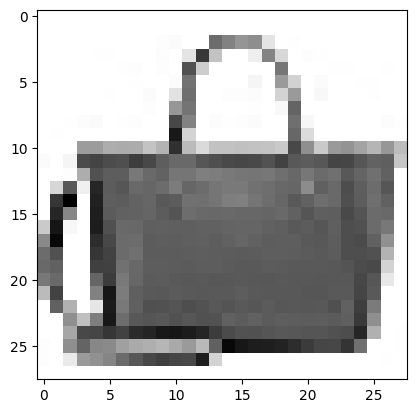

In [15]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [16]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
[[3.3765453e-17 7.8094513e-25 5.3585717e-19 1.0812314e-18 3.3384153e-18
  3.2734308e-19 2.0416356e-18 8.1187810e-17 1.0000000e+00 2.8203455e-19]]


9번째 값은 1이고 나머지는 거의 0

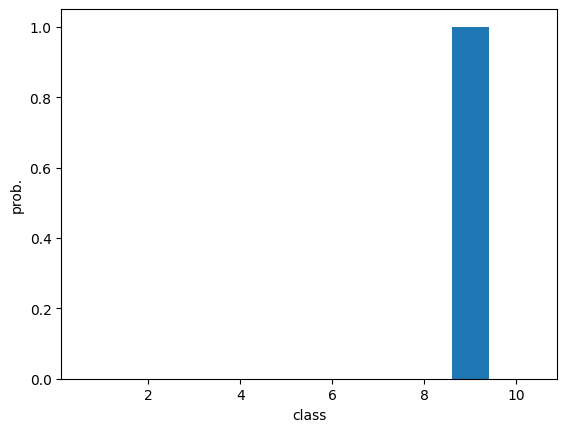

In [17]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

그래프로 확실하게 확인 가능

In [18]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [19]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [20]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

테스트 세트에서 확인하기 위해 리사이징하고

In [21]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9125 - loss: 0.2674


[0.25640809535980225, 0.9110000133514404]

처음 뗴어 놓았던 테스트 세트에서 돌렸는데 성능 꽤 높음